#### SEPSSIS PREDICTION

### Business Understanding

The objective of the project is to build an ML model to predict Sepssis and building an API using FastAPI to embed the built ML model

### Project Description

The analysis and machine learning applications of sepsis datasets are critical in advancing medical research and improving patient care outcomes. 
By leveraging these datasets, it will aid in the early detection, diagnosis, and management of sepsis in patients. This is crucial because early intervention can significantly improve patient outcomes.

### Data Understanding

The data consists of the following columns:

PL: Blood Work Result-1 (mu U/ml)

PR: Blood Pressure (mm Hg)

SK: Blood Work Result-2 (mm)

TS: Blood Work Result-3 (mu U/ml)

M11: Body mass index (weight in kg/(height in m)^2

BD2: Blood Work Result-4 (mu U/ml)

Age: patients age (years)

Insurance: If a patient holds a valid insurance card

Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwis

### Importing Libraries and packages

In [181]:
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import numpy as np
import re
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import joblib

warnings.filterwarnings('ignore')

### Loading Data

In [7]:
df = pd.read_csv('./Data/train.csv')
df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


### Exploratory Data Analysis(EDA)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [11]:
df.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop('ID', axis=1, inplace=True)

In [14]:
df.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Univariate Analysis**

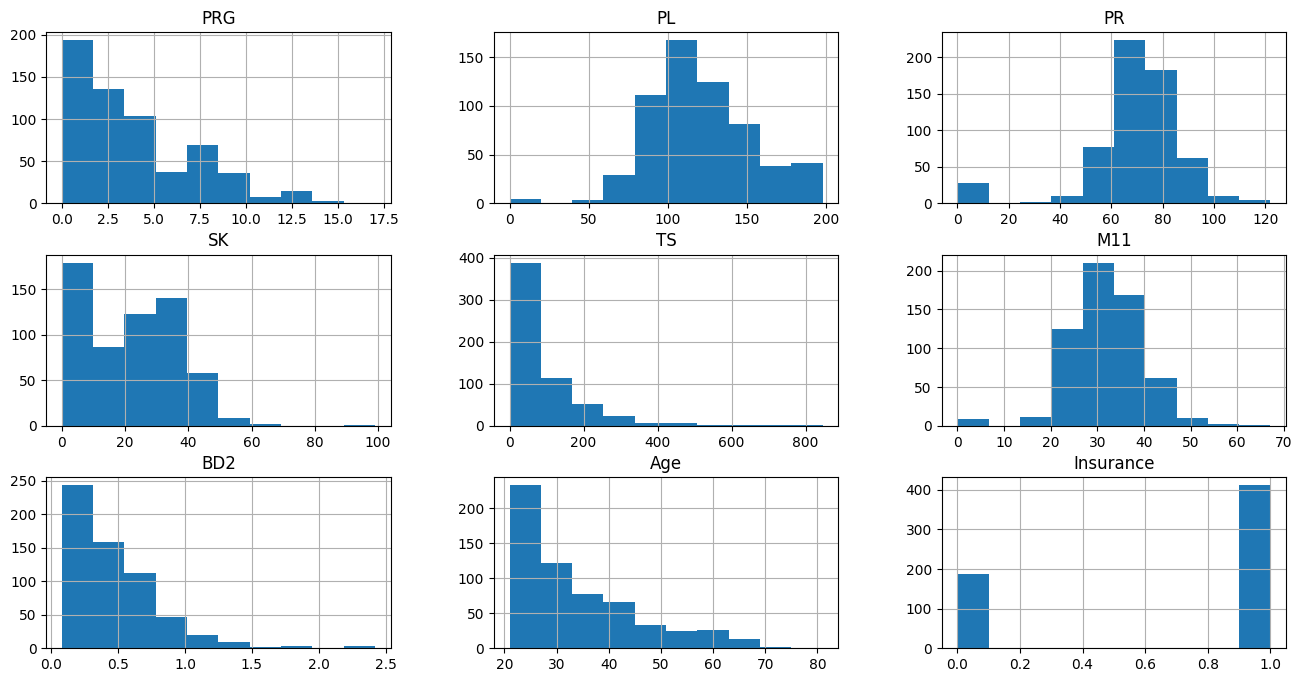

In [15]:
df.hist(figsize=(16,8))
plt.show()

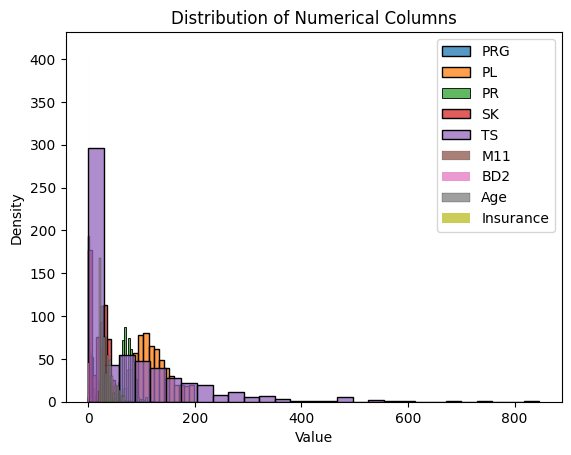

In [160]:
for column in df.select_dtypes(include=['number']).columns:
    sns.histplot(data=df[column], label=column)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of Numerical Columns')
plt.legend()
plt.show()

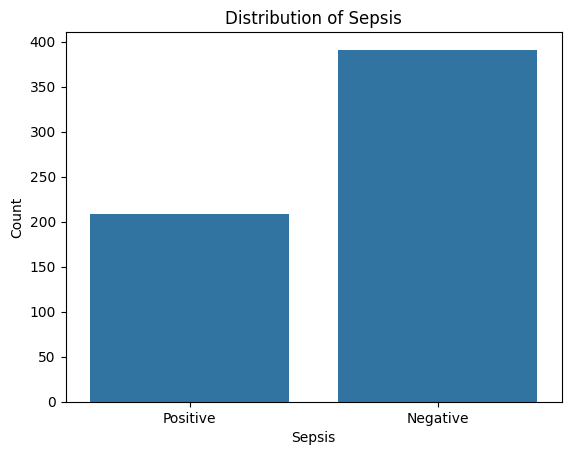

In [154]:
sns.countplot(x='Sepssis', data=df)
plt.title('Distribution of Sepsis')
plt.xlabel('Sepsis')
plt.ylabel('Count')
plt.show()

**Bivariate Analysis**

<Axes: >

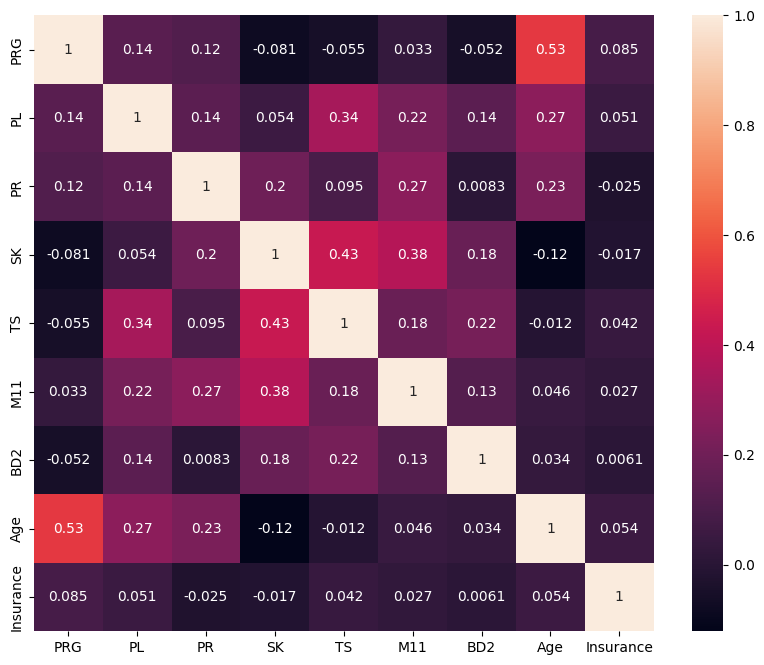

In [19]:
corr_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)

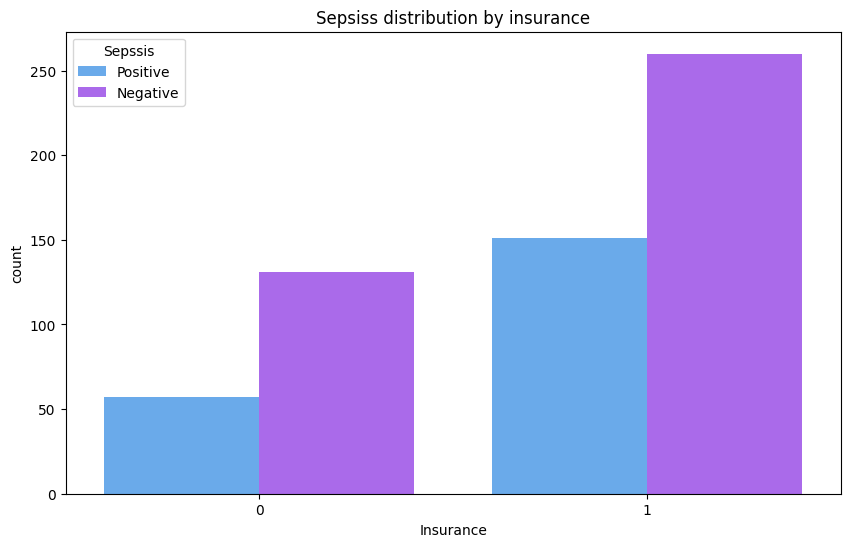

In [188]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.countplot(x="Insurance", hue="Sepssis", data=df, palette="cool")  
plt.title("Sepsiss distribution by insurance")  # Add title to the plot
plt.show()

### Data Preparation

In [64]:
# create a list of numeric columns
numerics = []
for column in df.columns:
    if df[column].dtype != "O":
        numerics.append(column)
numerics

['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']

In [65]:
# create a list of categorical columns
categoricals = []
for column in df.columns:
    if df[column].dtype == "O":
        categoricals.append(column)
categoricals

['Sepssis']

In [67]:
categoricals.remove('Sepssis')

### Check for Balanced Data

In [68]:
# checking the class distribution 
class_distro=df['Sepssis'].value_counts().rename('Total').reset_index()
class_distro

,Sepssis,Total
0,Negative,391
1,Positive,208


In [69]:
# check ratio of class distribution
class_distro['Ratio'] = class_distro['Total'].apply(lambda x: round((x/class_distro['Total'].sum()*100),2))
class_distro

,Sepssis,Total,Ratio
0,Negative,391,65.28
1,Positive,208,34.72


### Split Data

In [91]:
# Set X and y
X = df.drop(columns = "Sepssis", axis=1, inplace= False)
y = df["Sepssis"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2023, stratify=y)

In [92]:
# encoding y label

encoder= LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [93]:
print(X_train)

     PRG   PL  PR  SK   TS   M11    BD2  Age  Insurance
23     9  119  80  35    0  29.0  0.263   29          1
185    7  194  68  28    0  35.9  0.745   41          0
220    0  177  60  29  478  34.6  1.072   21          1
29     5  117  92   0    0  34.1  0.337   38          1
51     1  101  50  15   36  24.2  0.526   26          1
..   ...  ...  ..  ..  ...   ...    ...  ...        ...
144    4  154  62  31  284  32.8  0.237   23          1
21     8   99  84   0    0  35.4  0.388   50          1
474    4  114  64   0    0  28.9  0.126   24          1
564    0   91  80   0    0  32.4  0.601   27          0
433    2  139  75   0    0  25.6  0.167   29          0

[479 rows x 9 columns]


In [94]:
y_train_encoded

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,

### Pipeline

In [102]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ("scaler", RobustScaler())

])

categorical_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
                                          

])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerics),
    ("cat", categorical_transformer, categoricals)

])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', RobustScaler())]),
                                 ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2',
                                  'Age', 'Insurance']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 [])])

### MODEL & EVALUATION

In [161]:
models = [
    ('Decision_Tree', DecisionTreeClassifier(random_state=2023)),
    ('Logistic Regression', LogisticRegression(random_state=124)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

In [162]:
print(df.columns)

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis'],
      dtype='object')


In [163]:
all_pipelines ={}

all_confusion_matrix ={}

metric_table = pd.DataFrame(columns =['model_name', 'accuracy', 'precision','recall', 'f1_score'])

for model_name, classifier in models:

    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)

    ])

    final_pipeline.fit(X_train, y_train_encoded)

    all_pipelines[model_name]=final_pipeline

  # Predicting on the test set
    y_pred= final_pipeline.predict(X_test)

    conf_matrix = confusion_matrix(y_test_encoded, y_pred)

    #Add confusion matrix into the all_pipeline dictionary
    all_confusion_matrix[model_name]= conf_matrix



 # generate classification report for each pipeline or model
    metrics= classification_report(y_test_encoded, y_pred, output_dict = True)


    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall  = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']

    metric_table.loc[len(metric_table)]=[model_name, accuracy, precision, recall, f1]


### Evaluation

In [164]:
metric_table

,model_name,accuracy,precision,recall,f1_score
0,Decision_Tree,0.725000,0.726563,0.725000,0.725731
1,Logistic Regression,0.725000,0.717059,0.725000,0.718405
2,KNN,0.716667,0.713750,0.716667,0.715005
3,Random Forest,0.750000,0.744048,0.750000,0.745014
4,Gradient Boosting,0.766667,0.762644,0.766667,0.763750


In [165]:
metric_table.sort_values(by='f1_score', ascending = False)

,model_name,accuracy,precision,recall,f1_score
4,Gradient Boosting,0.766667,0.762644,0.766667,0.763750
3,Random Forest,0.750000,0.744048,0.750000,0.745014
0,Decision_Tree,0.725000,0.726563,0.725000,0.725731
1,Logistic Regression,0.725000,0.717059,0.725000,0.718405
2,KNN,0.716667,0.713750,0.716667,0.715005


### Train on Balanced Data

In [166]:
# hold trained models in all balanced pipeline
all_balanced_pipelines ={}

all_confusion_matrix ={}

# Data frame to store all model metrics
balanced_metric_table = pd.DataFrame(columns =['model_name', 'accuracy', 'precision','recall', 'f1_score'])

for model_name, classifier in models:

    # create final balanced pipeline with preprocessor and estimator
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote-sampler', SMOTE(random_state=0)),
        ('feature-selection', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier)

    ])

    #Fit data to pipeline
    balanced_pipeline.fit(X_train, y_train_encoded)

    # add all pipelines into all_pipeline dictionary
    all_balanced_pipelines[model_name]=balanced_pipeline

  # Predicting on the test set
    y_pred= balanced_pipeline.predict(X_test)

    conf_matrix = confusion_matrix(y_test_encoded, y_pred)

    #Add confusion matrix into the all_pipeline dictionary
    all_confusion_matrix[model_name]= conf_matrix



  # generate classification report for each pipeline or model
    balanced_metrics= classification_report(y_test_encoded, y_pred, output_dict = True)


    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall  = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']

    balanced_metric_table.loc[len(balanced_metric_table)]=[model_name, accuracy, precision, recall, f1]

    balanced_metric_table
    
balanced_metric_table.sort_values(by='f1_score', ascending=False)  

,model_name,accuracy,precision,recall,f1_score
3,Random Forest,0.775000,0.791688,0.775000,0.778999
1,Logistic Regression,0.741667,0.754427,0.741667,0.745534
4,Gradient Boosting,0.741667,0.754427,0.741667,0.745534
0,Decision_Tree,0.675000,0.684800,0.675000,0.678748
2,KNN,0.666667,0.726004,0.666667,0.673895


### Hyperparameter Tuning

In [167]:
metrics_list = []
# Dictionary containing hyperparameters to tune for each classifier
param_grid = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10]  
    },
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300,],  
        'classifier__max_depth': [None, 20, 30]  
    },
    'Decision_Tree': {
        'classifier__max_depth': [None, 10, 20]  
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7]  
    },
    'Gradient Boosting' : {
        'classifier__n_estimators' : [50, 100, 150, 200],
        'classifier__max_features' : ['auto', 'sqrt', 'log2', None],
        'classifier__learning_rate' : [0.05, 0.1, 0.5],
        'classifier__loss' : ['deviance', 'exponential'],
        'classifier__criterion' : ['friedman_mse', 'squared_error']

        
    }
}

# Iterate over each model
for model_name, classifier in models:
    # Create final balanced pipeline with preprocessor, SMOTE sampler, feature selection, and classifier
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote-sampler', SMOTE(random_state=0)),
        ('feature-selection', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier)
    ])
    
    # Perform grid search with cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(balanced_pipeline, param_grid[model_name], cv=5, scoring='f1', n_jobs=-1)
    
    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train_encoded)
    
    # Get the best estimator (pipeline) from the grid search
    best_pipeline = grid_search.best_estimator_
    
    # Add the best pipeline to the dictionary of all balanced pipelines
    all_balanced_pipelines[model_name] = best_pipeline
    
    # Predict on the test set using the best pipeline
    y_pred = best_pipeline.predict(X_test)
    
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    
    # Add confusion matrix to the dictionary
    all_confusion_matrix[model_name] = conf_matrix
    
    # Generate classification report for the best pipeline or model
    balanced_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    metrics_list.append([model_name,
                         balanced_metrics['accuracy'],
                         balanced_metrics['weighted avg']['precision'],
                         balanced_metrics['weighted avg']['recall'],
                         balanced_metrics['weighted avg']['f1-score']])

balanced_metric_table = pd.DataFrame(metrics_list, columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])
    
    
balanced_metric_table.sort_values(by='f1_score', ascending=False)    


,model_name,accuracy,precision,recall,f1_score
3,Random Forest,0.775000,0.782906,0.775000,0.777595
4,Gradient Boosting,0.758333,0.780611,0.758333,0.763158
1,Logistic Regression,0.741667,0.754427,0.741667,0.745534
2,KNN,0.666667,0.699219,0.666667,0.674044
0,Decision_Tree,0.641667,0.647778,0.641667,0.644332
